# Project: Wrangling and Analyze Data

In [195]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import re
import datetime as dt
import matplotlib.pyplot as plt

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Reading twitter_archive_enhanced downloaded via link provided.
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

In [4]:
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [5]:
# Reading image predictions file into pandas
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Creating an API object to be used to gather Twitter data
import tweepy

consumer_key = 'AsY3tQgGtRH523d9vYKY2jiiw'
consumer_secret = 'EbLqOvvoOM0JF0JUyP3NlZIB8KwYlVASRtDH6DYQhl5yOa4rFG'
access_token = '1476812277051449371-xsZG2wlaTo6n2tfaeg5SFmnAyZz5RT'
access_secret = 'rbIBwGgSssH4KSvtvZdjoh9HH3PhRMbqd2hEhtVR15rRS'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
# Looping through the tweet_id in twitter_archive_enhanced.
id_queried=[]
start = time.time()
for id in twitter_archive_enhanced['tweet_id']:
    try:
        # Get twitter data from id
        tweet_data = api.get_status(id, tweet_mode='extended')
        
        # Writing json component of tweet_data to file
        tweet_string = json.dumps(tweet_data._json)
        with open('tweet_json.txt','a') as outfile:
            outfile.write(tweet_string)
            outfile.write('\n')
            
        # Add queried id to list
        id_queried.append(id)
            
    except Exception as e:
        tweet_data._json = {'tweet_data':'deleted'}
        
end = time.time()
print(end - start)
len(id_queried)

7094.3109810352325


2248

In [9]:
# Reading JSON from tweet_json.txt File
api_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        try:
            #Extracting tweet id from each tweet line
            tweet_id = re.search('(\d{18})', line)
            tweet_id = tweet_id.group(0)

            # Extracting retweet count from each line
            tweet_retweet_count = re.search('("retweet_count":\s\d+)', line)
            tweet_retweet_count = tweet_retweet_count.group(0)

            # Extracting favourite(like)_count from each line
            tweet_like_count = re.search('("favorite_count":\s\d+)', line)
            tweet_like_count = tweet_like_count.group(0)

            # Append to list of dictionaries
            api_list.append({'tweet_id': tweet_id, 'retweet_count': tweet_retweet_count, 'favourite_count': tweet_like_count})
            
        except Exception as e:
            tweet_id = "Null"
            retweet_count = "Null"
            favourite_count = "Null"
            
                     
twitter_api_data = pd.DataFrame(api_list, columns = ['tweet_id','retweet_count','favourite_count'])       

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
1. Change all id datatypes to object in twitter_archive_enhanced table and image_predictions table

2. Change timestamp datatype to datetime.

3. Delete tweets compiled after August 1st, 2017 from twitter_archive_enhanced table

4. Remove retweets from twitter_archive_enhanced table

5. Remove tweet replies from twitter_archive_enhanced table

6. Missing values in expanded_urls columns in twitter_archive_enhanced table

7. Erroneous dog names in twitter_archive_enhanced table

8. Ratings inconsistent with WeRateDogs format

9. Change "None" in name column to NaN in twitter_archive_enhanced table

### Tidiness issues
1. Erroneous information in retweet_counts and favourite_counts column of twitter_api_data table

2. Remove reply and retweet status id and user id columns from twitter_archive_enhanced data table

3. Merge all dog type columns(doggo, floofer, pupper, puppo) into one column ('dog_stages')

4. twitter_api_data table should be part of twitter_archive_enhanced table

#### Displaying all 3 datasets and Inspecting

In [11]:
# Twitter Archive enhanced from WeRateDogs Twitter archive
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
744,780192070812196864,NaN,NaN,2016-09-25 23:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780192070...,11,10,None,None,None,None,None
620,796125600683540480,NaN,NaN,2016-11-08 23:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,NaN,NaN,NaN,https://twitter.com/king5seattle/status/796123...,13,10,None,None,None,None,None
875,761227390836215808,NaN,NaN,2016-08-04 15:48:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert. He just found out that bees ar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761227390...,10,10,Albert,None,None,None,None
179,857214891891077121,8.571567e+17,180670967.0,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None


In [12]:
# Image Predictions downloaded programmatically
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1603,800141422401830912,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
594,679503373272485890,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,1,porcupine,0.999846,False,meerkat,0.000072,False,echidna,0.000044,False
1720,819347104292290561,https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg,3,Rottweiler,0.909106,True,black-and-tan_coonhound,0.044120,True,Doberman,0.031835,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1645,808134635716833280,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True


In [13]:
# Additional twitter data extracted from Twitter API
twitter_api_data.sample(5)

,tweet_id,retweet_count,favourite_count
1413,692041934689402880,"""retweet_count"": 1130","""favorite_count"": 3112"
936,748699167502000129,"""retweet_count"": 1452","""favorite_count"": 4394"
938,748575535303884801,"""retweet_count"": 1795","""favorite_count"": 5611"
266,838476387338051585,"""retweet_count"": 4330","""favorite_count"": 20899"
1830,674051556661161984,"""retweet_count"": 431","""favorite_count"": 1288"


In [14]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
twitter_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2248 non-null   object
 1   retweet_count    2248 non-null   object
 2   favourite_count  2248 non-null   object
dtypes: object(3)
memory usage: 52.8+ KB


In [17]:
# Inspecting duplicated columns in all tables
all_columns = pd.Series(list(twitter_archive_enhanced) + list(image_predictions) + list(twitter_api_data))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [18]:
twitter_archive_enhanced['tweet_id'].duplicated().unique()

array([False])

In [23]:
image_predictions['tweet_id'].duplicated().unique()

array([False])

In [25]:
twitter_api_data['tweet_id'].duplicated().unique()

array([False])

In [21]:
twitter_archive_enhanced[twitter_archive_enhanced['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [26]:
# Make copies of original pieces of data
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
twitter_api_data_clean = twitter_api_data.copy()

### Quality issues

### Issue #1: Change all id datatypes to object in twitter_archive_enhanced table and image_predictions table

#### Define:
In the twitter_archive_enhanced table, convert the following to object data type (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id. And in the image_predictions table, convert tweet_id datatype to object.

#### Code

In [27]:
# twitter_archive_enhanced_clean table
twitter_archive_enhanced_clean.tweet_id = twitter_archive_enhanced_clean.tweet_id.astype('object')
twitter_archive_enhanced_clean['in_reply_to_status_id'] = twitter_archive_enhanced_clean['in_reply_to_status_id'].astype('object')
twitter_archive_enhanced_clean['in_reply_to_user_id'] = twitter_archive_enhanced_clean['in_reply_to_user_id'].astype('object')
twitter_archive_enhanced_clean['retweeted_status_id'] = twitter_archive_enhanced_clean['retweeted_status_id'].astype('object')
twitter_archive_enhanced_clean['retweeted_status_user_id'] = twitter_archive_enhanced_clean['retweeted_status_user_id'].astype('object')

# image_predictions_clean table
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('object')


#### Test

In [28]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       78 non-null     object
 2   in_reply_to_user_id         78 non-null     object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         181 non-null    object
 7   retweeted_status_user_id    181 non-null    object
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  doggo                       2356 non-null   obje

In [29]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #2: Change timestamp datatype to datetime.

#### Define
By changing the timestamp datatype to datetime, other cleaning tasks will be made simpler.

#### Code

In [30]:
twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)

#### Test

In [31]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #3: Delete tweets compiled after August 1st, 2017 from twitter_archive_enhanced table

#### Define
Since the image predictions used in this project were gather for tweets before August 1st, 2017, we shall take out data for all
tweets before August 1st, 2017.

#### Code

In [32]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean[
                                (twitter_archive_enhanced_clean.timestamp.dt.month > 6) & 
                                (twitter_archive_enhanced_clean.timestamp.dt.year == 2017)].index)

#### Test

In [33]:
twitter_archive_enhanced_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
58,880935762899988482,NaN,NaN,2017-06-30 23:47:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's crossing. It's a big deal....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880465832...,12,10,Bella,None,None,None,None
61,880221127280381952,NaN,NaN,2017-06-29 00:27:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jesse. He's a Fetty Woof. His tongue ejec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880221127...,12,10,Jesse,None,None,None,None
62,880095782870896641,NaN,NaN,2017-06-28 16:09:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880095782...,11,10,None,None,None,None,None


### Issue #4: Remove retweets from twitter_archive_enhanced table

#### Define
We only want original tweets in the final cleaned table. Each retweet has a corresponding id. these will be filtered and deleted.

#### Code

In [34]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean
                                    [twitter_archive_enhanced_clean['retweeted_status_id'].notnull()].index)

#### Test

In [35]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 58 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2120 non-null   object             
 1   in_reply_to_status_id       76 non-null     object             
 2   in_reply_to_user_id         76 non-null     object             
 3   timestamp                   2120 non-null   datetime64[ns, UTC]
 4   source                      2120 non-null   object             
 5   text                        2120 non-null   object             
 6   retweeted_status_id         0 non-null      object             
 7   retweeted_status_user_id    0 non-null      object             
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2064 non-null   object             
 10  rating_numerator            2120 non-null   int64          

### Issue #5: Remove tweet replies from twitter_archive_enhanced table

#### Define
We only want original tweets in the final cleaned table. Each tweet reply has a corresponding id. these will be filtered and deleted.

#### Code

In [36]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean
                                    [twitter_archive_enhanced_clean['in_reply_to_status_id'].notnull()].index)

#### Test

In [37]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 58 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2044 non-null   object             
 1   in_reply_to_status_id       0 non-null      object             
 2   in_reply_to_user_id         0 non-null      object             
 3   timestamp                   2044 non-null   datetime64[ns, UTC]
 4   source                      2044 non-null   object             
 5   text                        2044 non-null   object             
 6   retweeted_status_id         0 non-null      object             
 7   retweeted_status_user_id    0 non-null      object             
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2041 non-null   object             
 10  rating_numerator            2044 non-null   int64          

### Issue #6: Missing values in expanded_urls columns in twitter_archive_enhanced table

#### Define
The expanded urls column has 3 missing values. Since they are only 3, we can drop those entries

#### Code

In [38]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean
                                    [twitter_archive_enhanced_clean['expanded_urls'].isnull()].index)

#### Test

In [39]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041 entries, 58 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2041 non-null   object             
 1   in_reply_to_status_id       0 non-null      object             
 2   in_reply_to_user_id         0 non-null      object             
 3   timestamp                   2041 non-null   datetime64[ns, UTC]
 4   source                      2041 non-null   object             
 5   text                        2041 non-null   object             
 6   retweeted_status_id         0 non-null      object             
 7   retweeted_status_user_id    0 non-null      object             
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2041 non-null   object             
 10  rating_numerator            2041 non-null   int64          

### Issue #7: Erroneous dog names in twitter_archive_enhanced table

#### Define
From a visual observation of the name column in twitter_archive_enhanced shows some weird dog names. It is obvious the code used to extract the names from the tweet did not entirely work well for all entries. Also, some tweets did not contain the names of dogs at all so the code returned wrong information. These entries will be filtered and new code used to extract the dog name.


#### Code

In [41]:
# Filtering all rows that have the name column beginning with a small letter. Each dog name is expected to be a Proper Noun.
non_dog_name = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['name'].str.contains('^[a-z]')]

In [42]:
# Extracting any name in the tweet text that begins with a capital letter as the name of the dog.
non_dog_name['name'] = non_dog_name['text'].str.extract('named (\w+)')

C:\Users\Derrick\AppData\Local\Temp/ipykernel_2692/2599448244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_dog_name['name'] = non_dog_name['text'].str.extract('named (\w+)')


In [43]:
# Getting the index of interested rows suspected to have erroneous dog names
index_required = list(non_dog_name.index.values)

In [44]:
for index in index_required:
    twitter_archive_enhanced_clean.loc[index,'name'] = non_dog_name.loc[index, 'name']

#### Test

In [46]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041 entries, 58 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2041 non-null   object             
 1   in_reply_to_status_id       0 non-null      object             
 2   in_reply_to_user_id         0 non-null      object             
 3   timestamp                   2041 non-null   datetime64[ns, UTC]
 4   source                      2041 non-null   object             
 5   text                        2041 non-null   object             
 6   retweeted_status_id         0 non-null      object             
 7   retweeted_status_user_id    0 non-null      object             
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2041 non-null   object             
 10  rating_numerator            2041 non-null   int64          

In [ ]:
# As can be seen, the name values have decreased.

In [47]:
twitter_archive_enhanced_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
58,880935762899988482,NaN,NaN,2017-06-30 23:47:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's crossing. It's a big deal....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880465832...,12,10,Bella,None,None,None,None
61,880221127280381952,NaN,NaN,2017-06-29 00:27:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jesse. He's a Fetty Woof. His tongue ejec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880221127...,12,10,Jesse,None,None,None,None
62,880095782870896641,NaN,NaN,2017-06-28 16:09:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880095782...,11,10,None,None,None,None,None


### Issue #8: Ratings inconsistent with WeRateDogs format

#### Define
The typical WeRateDogs rating usually has a denominator of 10. Majority of the numerators are also in a range (0-14) from a visual inspection. Certain data entries have very large numerator and denominator values. Other ratings were extracted from wrong numbers in the tweet text. We can extract the right rating from the tweet text.

#### Code

In [48]:
# Filtering all rows that have numerator > 14 or denominator not equal to 10
rating_error = twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean['rating_denominator'] != 10)
                                              | (twitter_archive_enhanced_clean['rating_numerator'] > 14)]

In [49]:
# Extracting any suspected appropriate numerator in the tweet text.
rating_error['rating_numerator'] = rating_error['text'].str.extract('.(\d?\d?.?\d?\d)/10')

C:\Users\Derrick\AppData\Local\Temp/ipykernel_2692/707812275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_error['rating_numerator'] = rating_error['text'].str.extract('.(\d?\d?.?\d?\d)/10')


In [50]:
# Extracting any suspected appropriate denominator in the tweet text.
rating_error['rating_denominator'] = rating_error['text'].str.extract('./(10)')

C:\Users\Derrick\AppData\Local\Temp/ipykernel_2692/2217489564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_error['rating_denominator'] = rating_error['text'].str.extract('./(10)')


In [51]:
rating_error

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,NaN,NaN,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,NaN,NaN,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,NaN,NaN,NaN,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None


In [52]:
index_required_rating = list(rating_error.index.values)

In [53]:
for index in index_required_rating:
    twitter_archive_enhanced_clean.loc[index, 'rating_numerator'] = rating_error.loc[index, 'rating_numerator']
    twitter_archive_enhanced_clean.loc[index, 'rating_denominator'] = rating_error.loc[index, 'rating_denominator']
    

In [56]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041 entries, 58 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2041 non-null   object             
 1   in_reply_to_status_id       0 non-null      object             
 2   in_reply_to_user_id         0 non-null      object             
 3   timestamp                   2041 non-null   datetime64[ns, UTC]
 4   source                      2041 non-null   object             
 5   text                        2041 non-null   object             
 6   retweeted_status_id         0 non-null      object             
 7   retweeted_status_user_id    0 non-null      object             
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2041 non-null   object             
 10  rating_numerator            2029 non-null   object         

In [57]:
# Removing null values in the rating_numerator and rating_denominator
twitter_archive_enhanced_clean.dropna(subset=['rating_numerator','rating_denominator'], inplace = True)

In [58]:
# Change rating_numerator and rating_denominator datatypes back to float
twitter_archive_enhanced_clean['rating_numerator'] = twitter_archive_enhanced_clean['rating_numerator'].astype(float)
twitter_archive_enhanced_clean['rating_denominator'] = twitter_archive_enhanced_clean['rating_denominator'].astype(float)

In [59]:
# Removing the outliers (numerator = 420 and 1776)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(979)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(2074)

#### Test

In [60]:
twitter_archive_enhanced_clean['rating_numerator'].describe()

count    2027.000000
mean       10.554159
std         2.145933
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [61]:
twitter_archive_enhanced_clean['rating_denominator'].describe()

count    2027.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [62]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 58 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2027 non-null   object             
 1   in_reply_to_status_id       0 non-null      object             
 2   in_reply_to_user_id         0 non-null      object             
 3   timestamp                   2027 non-null   datetime64[ns, UTC]
 4   source                      2027 non-null   object             
 5   text                        2027 non-null   object             
 6   retweeted_status_id         0 non-null      object             
 7   retweeted_status_user_id    0 non-null      object             
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2027 non-null   object             
 10  rating_numerator            2027 non-null   float64        

### Issue #9: Change "None" in name column to NaN in twitter_archive_enhanced table

#### Define
The dog name has Null Values represented as "None". These will be changed to Nan

#### Code

In [64]:
twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean['name'].replace('None', np.NaN)

#### Test

In [65]:
twitter_archive_enhanced_clean['name'].sample(5)

1494    Chester
1246        NaN
1985     Cheryl
1798       Chuq
480       Akumi
Name: name, dtype: object

### Tidiness Issues

### Issue #1: Erroneous information in retweet_counts and favourite_counts column of twitter_api_data table

#### Define
The twitter_api_data table retweet_counts and favourite_counts columns should have only numbers. Datatype will also be changed to int

#### Code

In [67]:
twitter_api_data_clean.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,"""retweet_count"": 6966","""favorite_count"": 33661"
1,892177421306343426,"""retweet_count"": 5270","""favorite_count"": 29203"
2,891815181378084864,"""retweet_count"": 3464","""favorite_count"": 21958"
3,891689557279858688,"""retweet_count"": 7182","""favorite_count"": 36734"
4,891327558926688256,"""retweet_count"": 7710","""favorite_count"": 35129"


In [68]:
# Removing the text that precedes the count values
twitter_api_data_clean['retweet_count'] = twitter_api_data_clean['retweet_count'].str.strip('"retweet_count": ')
twitter_api_data_clean['favourite_count'] = twitter_api_data_clean['favourite_count'].str.strip('"favourites_count": ')

In [69]:
# Change datatypes to int
twitter_api_data_clean['retweet_count'] = twitter_api_data_clean['retweet_count'].astype(int)
twitter_api_data_clean['favourite_count'] = twitter_api_data_clean['favourite_count'].astype(int)

#### Test

In [71]:
twitter_api_data_clean.sample(5)

,tweet_id,retweet_count,favourite_count
1796,674790488185167872,216,981
2062,669353438988365824,225,563
2098,668631377374486528,280,616
182,854365224396361728,4132,17140
649,788178268662984705,1966,6869


In [72]:
twitter_api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2248 non-null   object
 1   retweet_count    2248 non-null   int32 
 2   favourite_count  2248 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 35.2+ KB


### Issue #2: Remove reply and retweet status id and user id columns from twitter_archive_enhanced data table

#### Define
These columns are no longer needed and can be dropped.

#### Code

In [74]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                              'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [75]:
list(twitter_archive_enhanced_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #3: Merge all dog stages columns(doggo, floofer, pupper, puppo) into one column ('dog_stages')


#### Define
It is preferred to have a single column which will indicate the stage of a particular dog since one dog can only be in one state

#### Code

In [77]:
# Combining all the dog stages text into one string
twitter_archive_enhanced_clean['dog_stages'] = twitter_archive_enhanced_clean[['doggo','floofer','pupper','puppo']].agg(''.join, axis=1)

In [78]:
# Inspecting to see unique values
twitter_archive_enhanced_clean['dog_stages'].unique()

array(['NoneNoneNoneNone', 'NoneNoneNonepuppo', 'NoneNonepupperNone',
       'doggoNoneNoneNone', 'doggoNoneNonepuppo', 'doggoflooferNoneNone',
       'doggoNonepupperNone', 'NoneflooferNoneNone'], dtype=object)

In [ ]:
# Some tweets had two dog_stages extracted. (doggo&puppo, doggo&floofer, doggo&pupper.).The tweet text will be inspected to find
# right dog_stage

In [79]:
# All data entries with more than one dog stage specified.
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean["dog_stages"] == 'doggoNoneNonepuppo']
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean["dog_stages"] == 'doggoflooferNoneNone']
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean["dog_stages"] == 'doggoNonepupperNone']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
460,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10.0,Dido,doggo,None,pupper,None,doggoNonepupperNone
531,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,NaN,doggo,None,pupper,None,doggoNonepupperNone
575,801115127852503040,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10.0,Bones,doggo,None,pupper,None,doggoNonepupperNone
705,785639753186217984,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10.0,Pinot,doggo,None,pupper,None,doggoNonepupperNone
733,781308096455073793,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12.0,10.0,NaN,doggo,None,pupper,None,doggoNonepupperNone
889,759793422261743616,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10.0,Maggie,doggo,None,pupper,None,doggoNonepupperNone
956,751583847268179968,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10.0,NaN,doggo,None,pupper,None,doggoNonepupperNone
1063,741067306818797568,2016-06-10 00:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12.0,10.0,NaN,doggo,None,pupper,None,doggoNonepupperNone
1113,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12.0,10.0,NaN,doggo,None,pupper,None,doggoNonepupperNone


In [80]:
# More than one dog referenced in tweet text. It is better to drop these entries
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop([531, 733, 889, 956, 1063, 1113])

In [81]:
# The dog_stage for the following were seen in the tweet text.
twitter_archive_enhanced_clean.loc[575,'dog_stages'] = 'doggoNoneNoneNone'
twitter_archive_enhanced_clean.loc[705,'dog_stages'] = 'doggoNoneNoneNone'
twitter_archive_enhanced_clean.loc[460,'dog_stages'] = 'NoneNonepupperNone'

In [82]:
twitter_archive_enhanced_clean['dog_stages'] = twitter_archive_enhanced_clean['dog_stages'].str.extract('(doggo|floofer|pupper|puppo)')

In [83]:
# Drop columns(doggo,floofer,pupper,puppo)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#### Test

In [84]:
# Testing by showing the unique cell values in the dog_stages column
twitter_archive_enhanced_clean['dog_stages'].unique()

array([nan, 'puppo', 'pupper', 'doggo', 'floofer'], dtype=object)

In [86]:
twitter_archive_enhanced_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
1451,695794761660297217,2016-02-06 02:22:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. His throne is modeled after him...,https://twitter.com/dog_rates/status/695794761...,13.0,10.0,Wyatt,NaN
1529,690248561355657216,2016-01-21 19:04:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxwell. That's his moped. He rents it...,https://twitter.com/dog_rates/status/690248561...,11.0,10.0,Maxwell,NaN
208,852311364735569921,2017-04-13 00:03:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wiggles. She would like you to spot he...,https://twitter.com/dog_rates/status/852311364...,13.0,10.0,Wiggles,NaN
246,845677943972139009,2017-03-25 16:45:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. Please only send in dogs. We only ...,https://twitter.com/dog_rates/status/845677943...,12.0,10.0,NaN,NaN
1035,744995568523612160,2016-06-20 20:49:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9.0,10.0,Abby,puppo


### Issue #4: twitter_api_data table should be part of twitter_archive_enhanced table

#### Define
Since the twitter_api_data is additional data about the tweets, It will be best to add this table to the twitter_archive_enhanced table by merging them on the tweet_id

#### Code

In [ ]:
# In the cleaning of the twitter_archive_enhanced data, we deleted all tweets from August 1, 2017 onwards.
# These entries will have to be deleted in the twitter_api_data also

In [160]:
twitter_api_data_clean = twitter_api_data_clean.drop(tadc.index[0:57])

In [162]:
# Reseting Index of twitter_archive_enhanced table
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.reset_index(drop = True)

In [164]:
# Reseting Index of twitter_api_data table
twitter_api_data_clean = twitter_api_data_clean.reset_index(drop = True)

In [165]:
# Ensuring the tweet_id are set to strings 
twitter_archive_enhanced_clean['tweet_id'] = twitter_archive_enhanced_clean['tweet_id'].astype(str)
twitter_api_data_clean['tweet_id'] = twitter_api_data_clean['tweet_id'].astype(str)

In [166]:
# Merging the two tables on the tweet_id column
twitter_archive_master = pd.merge(twitter_archive_enhanced_clean, twitter_api_data_clean, on=['tweet_id'], how='left' )

In [173]:
# Change retweet_count and favourite_count datatypes to int
twitter_archive_master['retweet_count'] = twitter_archive_master['retweet_count'].fillna(0)
twitter_archive_master['favourite_count'] = twitter_archive_master['favourite_count'].fillna(0)
twitter_archive_master['retweet_count'] = twitter_archive_master['retweet_count'].astype(np.int64)
twitter_archive_master['favourite_count'] = twitter_archive_master['favourite_count'].astype(np.int64)

#### Test

In [168]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favourite_count
0,880935762899988482,2017-06-30 23:47:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's crossing. It's a big deal....,https://twitter.com/dog_rates/status/880935762...,13.0,10.0,Louis,NaN,2325.0,14980.0
1,880872448815771648,2017-06-30 19:35:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,https://twitter.com/dog_rates/status/880872448...,12.0,10.0,NaN,NaN,3191.0,18625.0
2,880465832366813184,2017-06-29 16:39:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,https://twitter.com/dog_rates/status/880465832...,12.0,10.0,Bella,NaN,5190.0,24898.0
3,880221127280381952,2017-06-29 00:27:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jesse. He's a Fetty Woof. His tongue ejec...,https://twitter.com/dog_rates/status/880221127...,12.0,10.0,Jesse,NaN,3445.0,23548.0
4,880095782870896641,2017-06-28 16:09:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,https://twitter.com/dog_rates/status/880095782...,11.0,10.0,NaN,NaN,3634.0,24207.0


In [174]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2020
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2021 non-null   object             
 1   timestamp           2021 non-null   datetime64[ns, UTC]
 2   source              2021 non-null   object             
 3   text                2021 non-null   object             
 4   expanded_urls       2021 non-null   object             
 5   rating_numerator    2021 non-null   float64            
 6   rating_denominator  2021 non-null   float64            
 7   name                1366 non-null   object             
 8   dog_stages          321 non-null    object             
 9   retweet_count       2021 non-null   int64              
 10  favourite_count     2021 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(6)
memory usage: 189.5+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [176]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [200]:
twitter_archive_master.groupby('dog_stages').sum()

,rating_numerator,rating_denominator,retweet_count,favourite_count
dog_stages,,,,
doggo,873.00,740.0,388699,1114093
floofer,94.00,80.0,26787,64353
pupper,2337.27,2180.0,404794,1226358
puppo,250.00,210.0,113825,392353


In [215]:
twitter_archive_master.groupby('dog_stages')['retweet_count', 'favourite_count'].describe()

C:\Users\Derrick\AppData\Local\Temp/ipykernel_2692/80196060.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twitter_archive_master.groupby('dog_stages')['retweet_count', 'favourite_count'].describe()


retweet_count                                                     \
                   count         mean           std    min      25%     50%   
dog_stages                                                                    
doggo               74.0  5252.689189  10910.030050    0.0  1421.75  2075.5   
floofer              8.0  3348.375000   4718.045598  395.0   791.75  1888.0   
pupper             218.0  1856.853211   3094.952607    0.0   529.00   920.0   
puppo               21.0  5420.238095   8667.479224  567.0  1359.00  2574.0   

                             favourite_count                              \
                75%      max           count          mean           std   
dog_stages                                                                 
doggo       3951.75  70282.0            74.0  15055.310811  22826.975396   
floofer     2978.75  14628.0             8.0   8044.125000   8700.778232   
pupper      1900.00  30042.0           218.0   5625.495413   9357.752791   
puppo       5251.00  39722.0            21.0  18683.476190  26633.891029   

                                                         
               min      25%     50%       75%       max  
dog_stages                                               
doggo          0.0  4771.25  8776.0  14110.75  144071.0  
floofer     1347.0  3013.50  4875.5   9700.00   27979.0  
pupper         0.0  1895.00  2646.5   6148.75  108373.0  
puppo       2729.0  5885.00  9670.0  17059.00  123502.0

### Insights:
1. Tweets about dogs at the pupper stage received the highest number of likes cummulatively according to the datasets but It cannot be concluded that most tweeter users fancied pupper stage dogs. This is because, there were also more tweets about pupper stage dogs but the mean favourite count is lower than the others. 

2. The puppo staged dogs seemed to be the most liked since they had the highest average likes and also the tweet with the largest number of likes was about a puppo staged dog.

3. There seem to be a correlation between number of retweets and number of likes of a twitter post. This is posited from the fact that puppo > doggo > floofer > pupper in the mean number of retweet_count and favourite_count

### Visualization

In [218]:
stages_favourite_group = twitter_archive_master.groupby(['dog_stages'])['favourite_count'].mean()

In [219]:
stages_favourite_group

dog_stages
doggo      15055.310811
floofer     8044.125000
pupper      5625.495413
puppo      18683.476190
Name: favourite_count, dtype: float64

Text(0, 0.5, 'Average Tweet Likes')

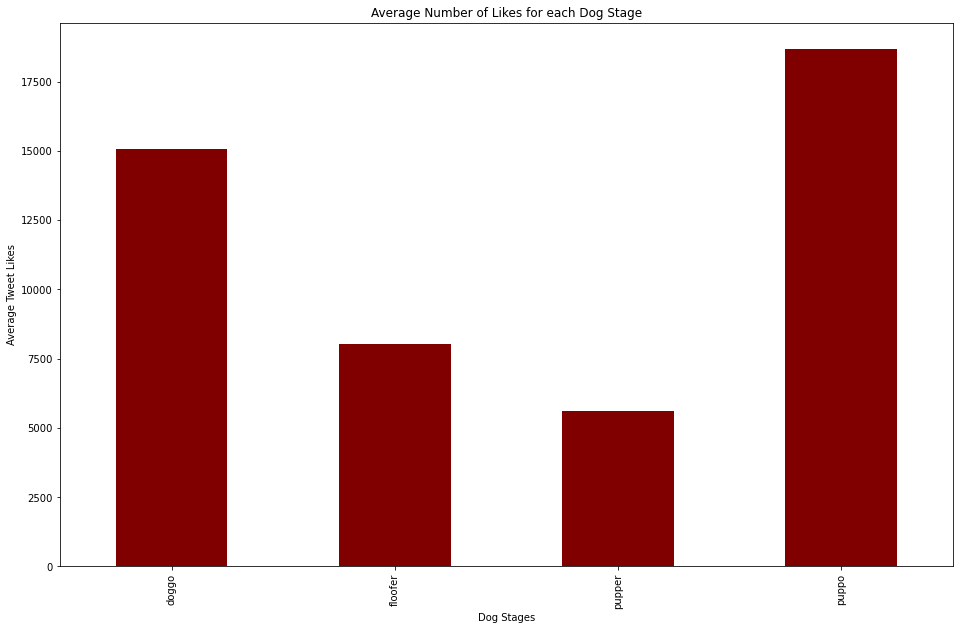

In [220]:
stages_rating_group.plot(kind='bar', title ="Average Number of Likes for each Dog Stage", figsize=(16,10), color='maroon')
plt.xlabel("Dog Stages")
plt.ylabel("Average Tweet Likes")